In [3]:
# Import necessary libraries
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib


In [12]:
# Load the forex rate dataset
df = pd.read_csv("/content/AAPL.USUSD_Candlestick_2_D_BID_18.08.2023-18.02.2024.csv")
df.describe()


,Open,High,Low,Close,Volume
count,93.000000,93.000000,93.000000,93.000000,93.000000
mean,183.605634,185.269473,182.116957,183.858817,1111.686526
std,8.059573,7.772093,8.230599,7.984380,717.118618
min,168.206000,168.206000,165.686000,168.206000,0.000000
25%,176.707000,179.037000,174.787000,177.177000,617.448000
50%,184.316000,186.306000,182.276000,185.096000,1240.392000
75%,190.246000,191.546000,189.246000,190.366000,1629.216000
max,197.526000,199.606000,196.967000,198.127000,2562.384000


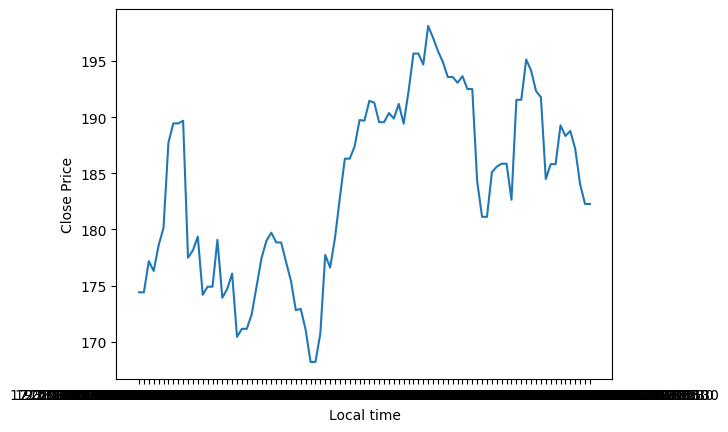

In [7]:
import matplotlib.pyplot as plt

plt.plot(df["Local time"], df["Close"])
plt.xlabel("Local time")
#Here local time means the different dates
plt.ylabel("Close Price")
plt.show()

In [11]:

# Prepare the data
X = df[["Open", "High", "Low", "Close"]]
y = df["Close"]

# Train the model
model = LinearRegression()
model.fit(X, y)

# Evaluate the model
y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print("Mean squared error:", mse)
print("R-squared score:", r2)

# Save the model
joblib.dump(model, "model/model.joblib")

# Implement a trading strategy (simplified example)
def trade(model, data):
  predictions = model.predict(data)
  if predictions[-1] > predictions[-2]:
    # Buy signal
    print("Buy")
  else:
    # Sell signal
    print("Sell")

# Backtest the trading strategy

# Load historical forex rate data
historical_data = pd.read_csv("/content/AAPL.USUSD_Candlestick_2_D_BID_18.08.2023-18.02.2024.csv")

# Prepare the data
X_test = historical_data[["Open", "High", "Low", "Close"]]

# Make predictions on the historical data
y_pred = model.predict(X_test)

# Implement the trading strategy
for i in range(1, len(y_pred)):
  if y_pred[i] > y_pred[i-1]:
    print(f"Day {i}: Buy signal")
  else:
    print(f"Day {i}: Sell signal")

# Analyze the results of the backtest

# Calculate the total number of trades
total_trades = len([x for x in y_pred if not pd.isna(x)])

# Calculate the percentage of winning trades
winning_trades = len([x for x in y_pred if x > 0])
win_rate = winning_trades / total_trades * 100

# Calculate the average trade profit
profits = []
for i in range(1, len(y_pred)):
  if y_pred[i] > y_pred[i-1]:
    profits.append(historical_data["Close"][i] - historical_data["Close"][i-1])
  else:
    profits.append(historical_data["Close"][i-1] - historical_data["Close"][i])
average_profit = sum(profits) / len(profits)

# Calculate the maximum drawdown
running_max = 0
max_drawdown = 0
for profit in profits:
  running_max = max(running_max + profit, 0)
  max_drawdown = min(max_drawdown, running_max)

# Print the results
print("Total trades:", total_trades)
print("Win rate:", win_rate, "%")
print("Average profit:", average_profit)
print("Maximum drawdown:", max_drawdown)

Mean squared error: 5.645869016291457e-28
R-squared score: 1.0
Day 1: Sell signal
Day 2: Buy signal
Day 3: Sell signal
Day 4: Buy signal
Day 5: Buy signal
Day 6: Buy signal
Day 7: Buy signal
Day 8: Sell signal
Day 9: Buy signal
Day 10: Sell signal
Day 11: Buy signal
Day 12: Buy signal
Day 13: Sell signal
Day 14: Buy signal
Day 15: Sell signal
Day 16: Buy signal
Day 17: Sell signal
Day 18: Buy signal
Day 19: Buy signal
Day 20: Sell signal
Day 21: Buy signal
Day 22: Sell signal
Day 23: Buy signal
Day 24: Buy signal
Day 25: Buy signal
Day 26: Buy signal
Day 27: Buy signal
Day 28: Sell signal
Day 29: Sell signal
Day 30: Sell signal
Day 31: Sell signal
Day 32: Sell signal
Day 33: Buy signal
Day 34: Sell signal
Day 35: Sell signal
Day 36: Buy signal
Day 37: Buy signal
Day 38: Buy signal
Day 39: Sell signal
Day 40: Buy signal
Day 41: Buy signal
Day 42: Buy signal
Day 43: Sell signal
Day 44: Buy signal
Day 45: Buy signal
Day 46: Sell signal
Day 47: Buy signal
Day 48: Sell signal
Day 49: Sell s